In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#step 2 import libraries
import pandas as pd
import numpy as np


In [3]:
# Step 2: Load the Dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target  # Add target column (0, 1, 2 for species)
data['species'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [4]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
print(data.head())
data

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
# Step 3: Basic Data Cleaning
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


In [ ]:
# No missing values in Iris dataset, so no action needed.

In [6]:
# Step 4: Split Data into Features (X) and Target (y)
X = data[iris.feature_names]  # Use all 4 features
y = data['target']

In [7]:
# Step 5: Split into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")



Training samples: 120
Test samples: 30


In [8]:
# Step 6: Train the Naive Bayes Model
model = GaussianNB()  # GaussianNB assumes features follow a normal distribution
model.fit(X_train, y_train)

GaussianNB()

In [9]:
# Step 7: Make Predictions
y_pred = model.predict(X_test)

In [10]:
# Step 8: Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.2f}")



Test Accuracy: 1.00


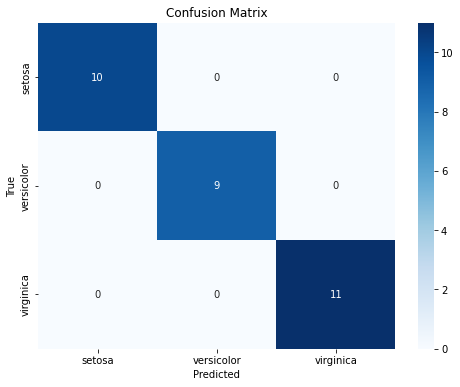

In [11]:
# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


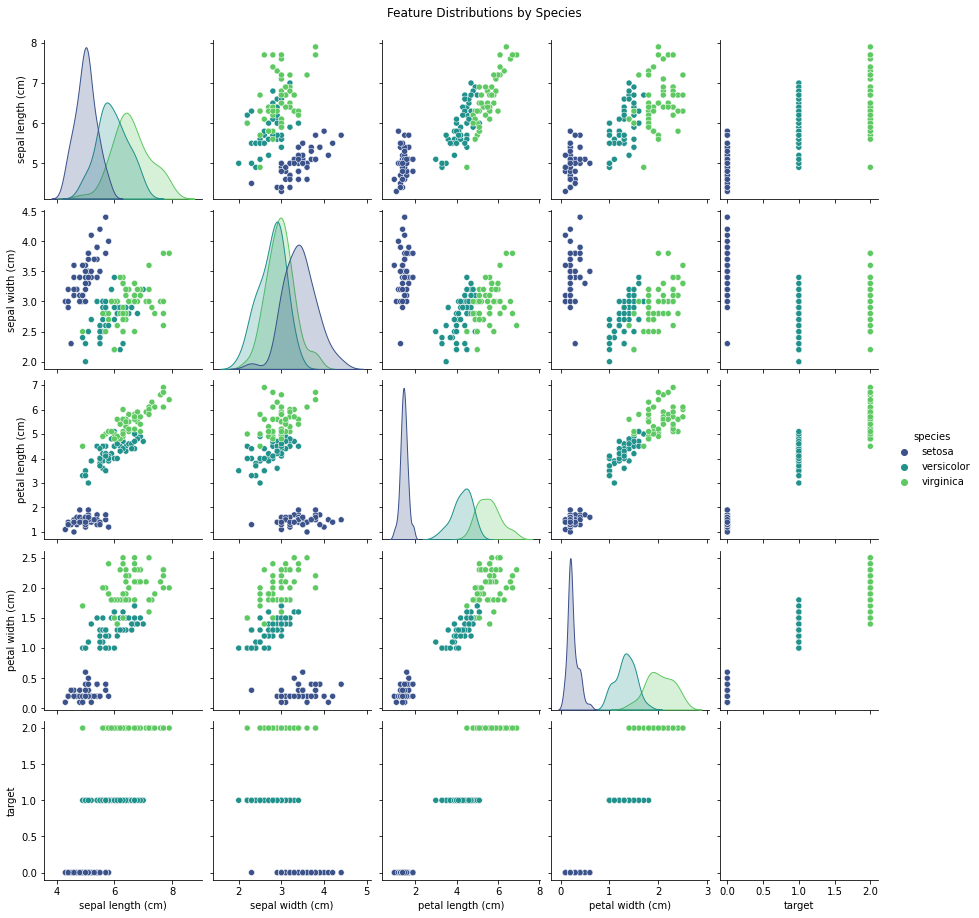

In [12]:
# Step 10: Visualize Feature Distributions
sns.pairplot(data, hue='species', palette='viridis')
plt.suptitle("Feature Distributions by Species", y=1.02)
plt.show()

In [12]:
def predict_species():
    print("\nEnter flower measurements to predict species:")
    sepal_length = float(input("Sepal length (cm): "))
    sepal_width = float(input("Sepal width (cm): "))
    petal_length = float(input("Petal length (cm): "))
    petal_width = float(input("Petal width (cm): "))
    
    # Create a DataFrame with user input
    user_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                             columns=iris.feature_names)
    
    # Predict
    prediction = model.predict(user_data)
    species = iris.target_names[prediction][0]
    
    print(f"\nPredicted species: {species.capitalize()}")

# Example usage:
predict_species()


Enter flower measurements to predict species:
Sepal length (cm): 5.2
Sepal width (cm): 4.3
Petal length (cm): 1.1
Petal width (cm): 0.7

Predicted species: Setosa
